# 
1. The transition matrix (in right-stochastic form) in terms of p and q:
   \begin{equation*}
  P = \left[ \begin{array}{llll}
       1 & 0 & 0 & 0  \\
       p & q & 0 & 0 \\
       0 & p & q & 0 \\
       0 & 0 & p & q\\
       \end{array} \right]
\end{equation*}

2. 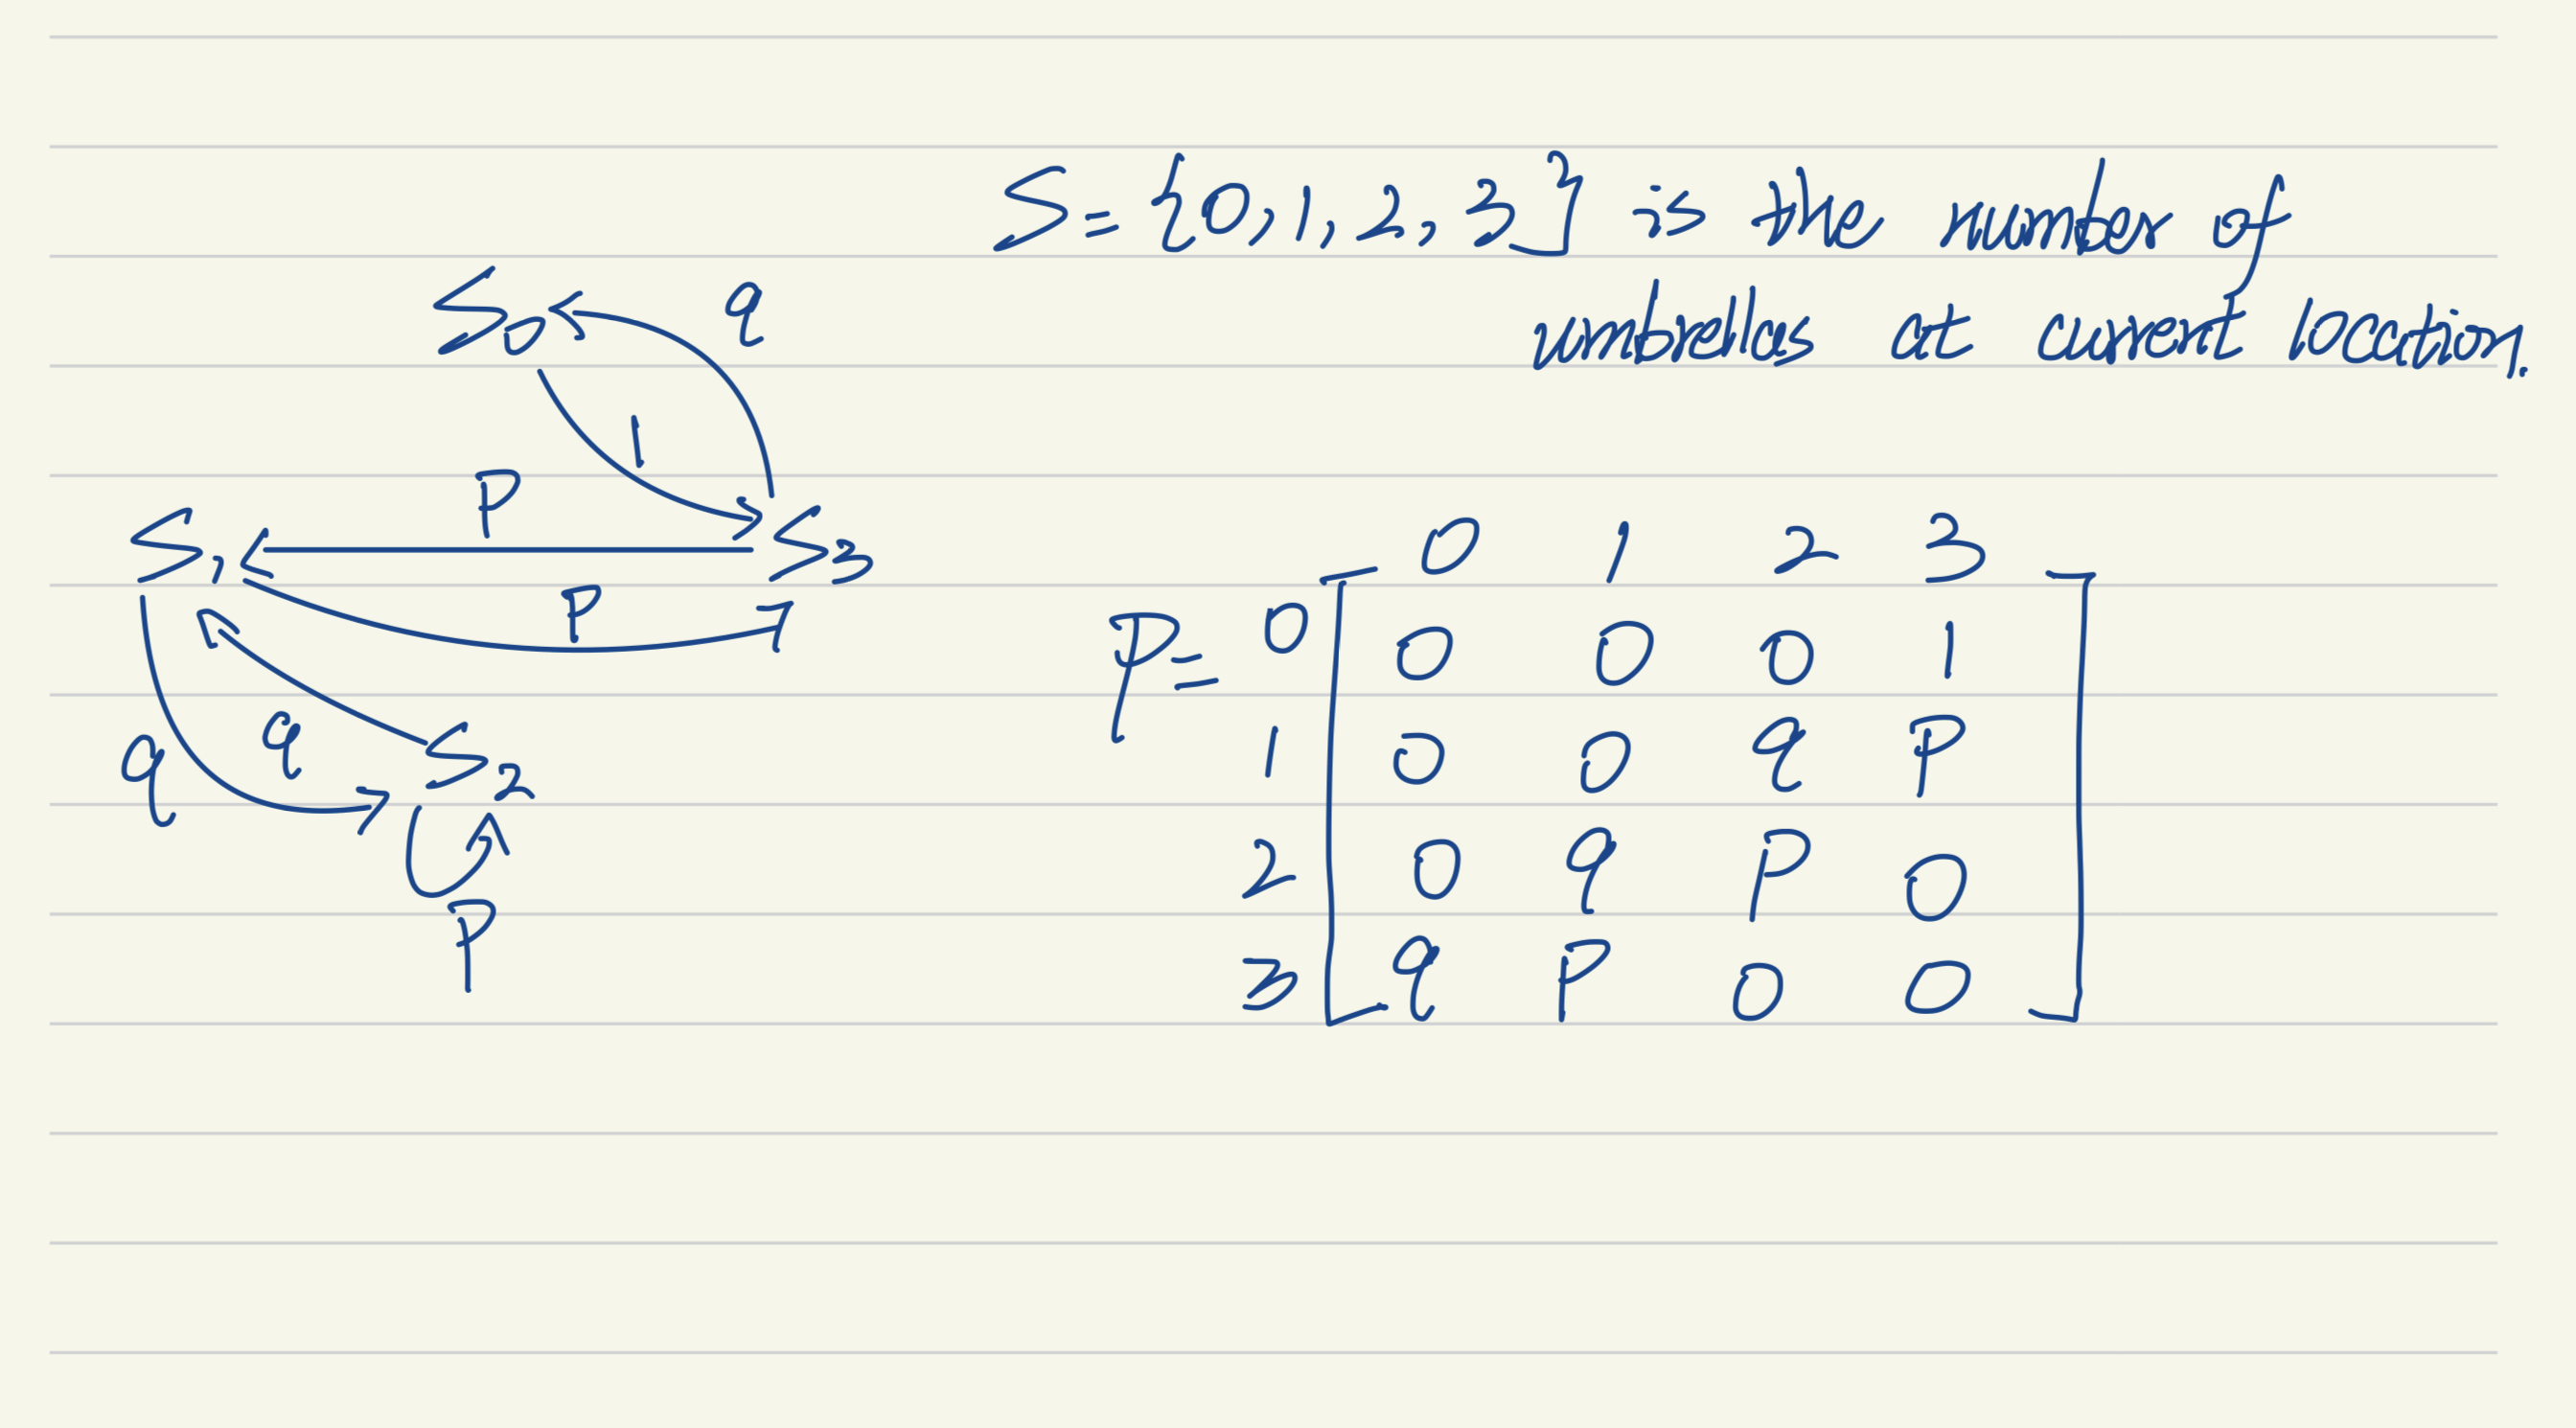

3. According to the $\pi$ calculated by the R code below: $\bar{\lambda} = \pi = (0.1666667, 0.2777778, 0.2777778, 0.2777778)$

    So, The probability that the person will get wet = P(At state 0) $\times$ P(from 0 to 3 when it is rainy):

\begin{eqnarray*}
P(Wet) &=& P(X_n = 0) P(X_{n+1}=3 | X_n = 0) \\
        &=& \lambda_{0} \times P_{03} \\
        &=& 0.1666667 \times 0.4 \\
        &=& 0.06666667
\end{eqnarray*}

Thus, $P(Wet) = 0.06666667$

In [1]:
m = matrix(0, nrow=4,ncol=4)  #define a vector
m[1,] = c(0,0,0,1)        #specify the row entries
m[2,] = c(0,0,0.6, 0.4)
m[3,] = c(0,0.6,0.4,0)
m[4,] = c(0.6, 0.4, 0, 0)
print(m)

e = eigen(t(m))               #solve for the eigenvalues and eigenvectors of the transpose matrix
print(e)                      #Note, the leading eigenvalue is 1, and all the rest are smaller

pi = e$vectors[,1]/sum(e$vectors[,1])  #Extract the corresponding eigenvector and normalize it
print(pi)
print(pi[1] * 0.4)

     [,1] [,2] [,3] [,4]
[1,]  0.0  0.0  0.0  1.0
[2,]  0.0  0.0  0.6  0.4
[3,]  0.0  0.6  0.4  0.0
[4,]  0.6  0.4  0.0  0.0
eigen() decomposition
$values
[1]  1.0000000 -0.9105598  0.6664830 -0.3559231

$vectors
           [,1]       [,2]       [,3]       [,4]
[1,] -0.3273268  0.4764328  0.4568312 -0.3605697
[2,] -0.5455447  0.4548329 -0.2965605  0.7111017
[3,] -0.5455447 -0.2082314 -0.6677210 -0.5644238
[4,] -0.5455447 -0.7230342  0.5074503  0.2138918

[1] 0.1666667 0.2777778 0.2777778 0.2777778
[1] 0.06666667


#
Given the expected value 16, $\mu = 16$.

Thus, according to Markov inequality: 
\begin{eqnarray*}
P(X \geq 18) &=& \frac{\mu}{18} \\
             &=& \frac{16}{18}\\
             &=& 0.8889
\end{eqnarray*}

#

In [1]:
set.seed(100)

K = c(100, 200, 400, 800, 1600, 3200, 6400)
mean = numeric(0)
var = numeric(0)
x = 1
for(i in K){
    sample = rpois(i,10)
    mean[x] = mean(sample)
    var[x] = var(sample)
    x = x + 1
}

print(mean)
print(var)

    

[1]  9.560000 10.135000 10.227500  9.986250  9.892500  9.933438  9.991094
[1]  9.602424  9.283191 11.068415  9.996056  9.774553  9.775812 10.044459


In [3]:
library(Hmisc)

1. The table:
   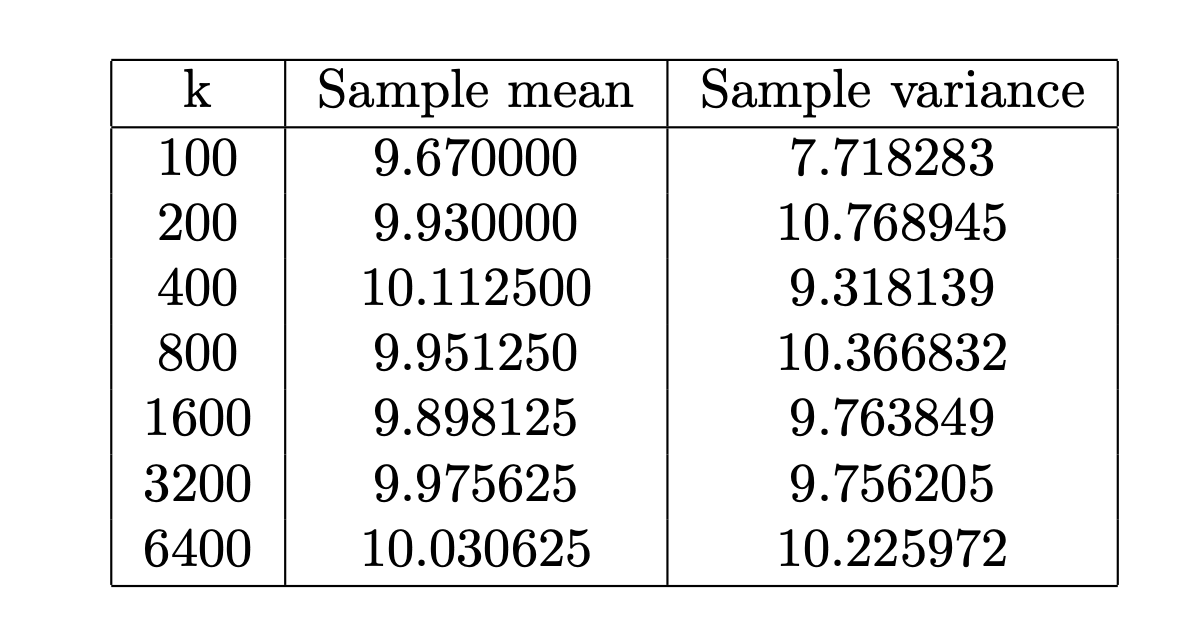


2. 

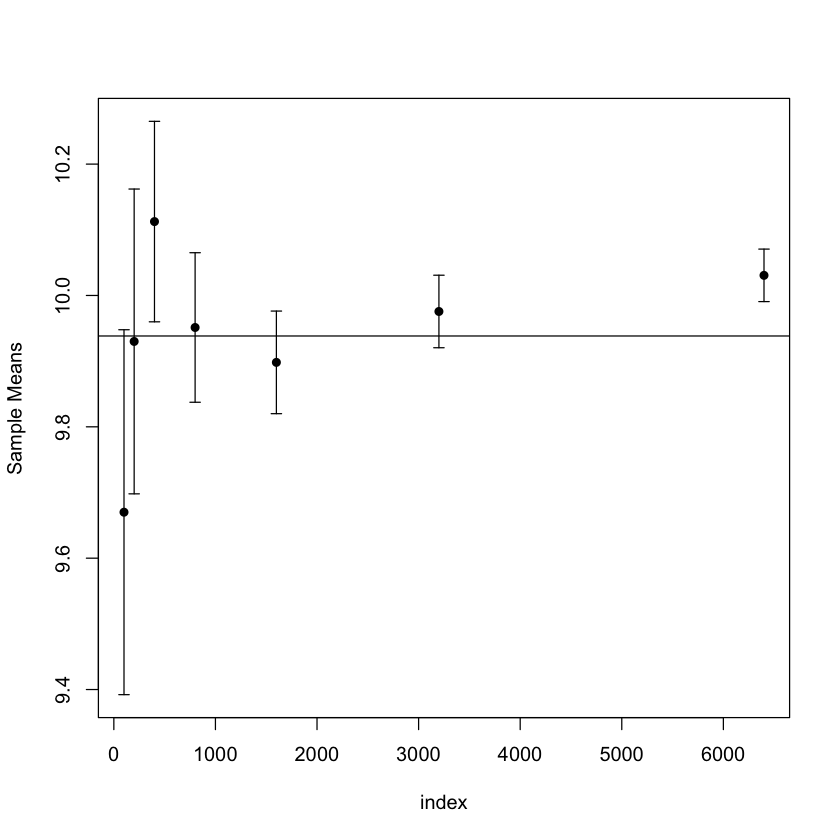

In [4]:
stderr = sqrt(var/K)
errbar(K, mean, mean-stderr, mean+stderr, xlab = "index", ylab = "Sample Means")
abline(h=mean(mean))

3. According to the output of the R code below, the minimum number of observations = 61

In [1]:
set.seed(100)
K = 0
P = 0
Sample = 0 
Mean = 0
Var = 0
while (TRUE){
    K = K + 1                                     #number of samples   
    Sample = rpois(K,10)                          
    Mean = mean(Sample)          #mean on K samples
    Var =  var(Sample)           # variance on K samples 
    
    a = Mean-0.01*Mean                            #u-0.01*u
    b = Mean+0.01*Mean                            #u+0.01*u

    P = pnorm(b, Mean, Var/K) - pnorm(a, Mean, Var/K)  #P(μ − 0.01μ < X < μ + 0.01μ) = P(a < X < b)
    P = round(P, 2)
    
     if (!is.na(P) && abs(P - 0.97) < 0.01) {  # using a tolerance for comparison
        break
    }
}
print(P)
print(K)



[1] 0.97
[1] 185


In [ ]:
L = 10 
mean = L 
var = L
a = mean - 0.01*mean
b = mean - 0.01*mean 
Nvar = 

In [2]:
help("qnorm")

Normal {stats},R Documentation
"x, q",vector of quantiles.
p,vector of probabilities.
n,"number of observations. If length(n) > 1, the length is taken to be the number required."
mean,vector of means.
sd,vector of standard deviations.
"log, log.p","logical; if TRUE, probabilities p are given as log(p)."
lower.tail,"logical; if TRUE (default), probabilities are P[X ≤ x] otherwise, P[X > x]."


#
1. 
Sicne $X_1 = 1$, $X_2 = 2 $, $X_3=1$ ~ Geom(P)

Thus, 
\begin{eqnarray*}
L &=& P \times (1-P)P \times P \\
  &=& P^{3} - P^{4}
\end{eqnarray*}

Set $\frac{dL}{dP} = 0$:
\begin{equation*}
\frac{dL}{dP} =  3P^{2} - 4P^{3}  = 0 \\ 
\end{equation*}
\begin{equation*}
P = \frac{3}{4}
\end{equation*}

Check if $\frac{d^2L}{dP^2} < 0$:
\begin{eqnarray*}
\frac{d^2L}{dP^2}(P = \frac{3}{4}) &=&  6P - 12P^{2} \\
                                   &=&  -2.25 
\end{eqnarray*}

So, $P = \frac{3}{4}$ indeed maximizes L 


2.
Sicne $X_1 = 1$, $X_2 = 2 $, $X_3=2$ ~ Geom(P)
Thus, 
\begin{eqnarray*}
L &=& P \times (1-P)P \times (1-P)P \\
  &=& P^{3} + P^{5} - 2P^{4}
\end{eqnarray*}

Set $\frac{dL}{dP} = 0$:
\begin{equation*}
\frac{dL}{dP} =  3P^{2} + 5P^{4} - 8P^{3} = 0 
\end{equation*}

\begin{equation*}
P_1 = 1, P_2 = 0.6
\end{equation*}

Check if $\frac{d^2L}{dP^2} < 0$ for $P_1 = 1, P_2 = 0.6$:
\begin{eqnarray*}
\frac{d^2L}{dP^2}(P = 1) &=&  6P +20P^{3} - 24P^{2} \\
                                   &=&  2 
\end{eqnarray*}

\begin{eqnarray*}
\frac{d^2L}{dP^2}(P = 0.6) &=&  6P +20P^{3} - 24P^{2} \\
                                   &=&  -0.72 
\end{eqnarray*}

So, $P_2 = 0.6$ maximizes L 